In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ConfusionMatrix



# Regression

## EDA

In [2]:
df = pd.read_csv('combinedHealthPred.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,bmi,children,smoker,region,expenses
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1,27.9,0,yes,southwest,16884.92
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0,33.8,1,no,southeast,1725.55
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1,33.0,3,no,southeast,4449.46
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0,22.7,0,no,northwest,21984.47
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0,28.9,0,no,northwest,3866.86


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1338 non-null   int64  
 1   Gender                1338 non-null   object 
 2   Age                   1338 non-null   int64  
 3   Driving_License       1338 non-null   int64  
 4   Region_Code           1338 non-null   int64  
 5   Previously_Insured    1338 non-null   int64  
 6   Vehicle_Age           1338 non-null   object 
 7   Vehicle_Damage        1338 non-null   object 
 8   Annual_Premium        1338 non-null   int64  
 9   Policy_Sales_Channel  1338 non-null   int64  
 10  Vintage               1338 non-null   int64  
 11  Response              1338 non-null   int64  
 12  bmi                   1338 non-null   float64
 13  children              1338 non-null   int64  
 14  smoker                1338 non-null   object 
 15  region               

In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,38.446188,0.998505,26.063528,0.446936,31287.732436,113.249626,157.144245,0.120329,30.665471,1.094918,13270.422414
std,386.391641,15.623291,0.038648,13.056794,0.497362,16766.353400,53.804090,82.298893,0.325467,6.098382,1.205493,12110.011240
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000,16.000000,0.000000,1121.870000
25%,335.250000,24.000000,1.000000,15.000000,0.000000,25028.750000,31.250000,88.000000,0.000000,26.300000,0.000000,4740.287500
50%,669.500000,35.000000,1.000000,28.000000,0.000000,32321.500000,151.000000,156.500000,0.000000,30.400000,1.000000,9382.030000
75%,1003.750000,49.000000,1.000000,35.000000,1.000000,40501.500000,152.000000,230.000000,0.000000,34.700000,2.000000,16639.915000
max,1338.000000,84.000000,1.000000,51.000000,1.000000,139130.000000,163.000000,299.000000,1.000000,53.100000,5.000000,63770.430000


In [ ]:
df = df.drop('id', axis = 1)
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,bmi,children,smoker,region,expenses
0,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1,27.9,0,yes,southwest,16884.92
1,Male,76,1,3,0,1-2 Year,No,33536,26,183,0,33.8,1,no,southeast,1725.55
2,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1,33.0,3,no,southeast,4449.46
3,Male,21,1,11,1,< 1 Year,No,28619,152,203,0,22.7,0,no,northwest,21984.47
4,Female,29,1,41,1,< 1 Year,No,27496,152,39,0,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Female,58,1,28,0,1-2 Year,Yes,35616,122,126,0,31.0,3,no,northwest,10600.55
1334,Male,24,1,18,0,< 1 Year,Yes,29498,152,59,0,31.9,0,no,northeast,2205.98
1335,Female,30,1,26,1,< 1 Year,No,26130,151,251,0,36.9,0,no,southeast,1629.83
1336,Female,58,1,21,1,1-2 Year,No,2630,160,298,0,25.8,0,no,southwest,2007.95


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                1338 non-null   object 
 1   Age                   1338 non-null   int64  
 2   Driving_License       1338 non-null   int64  
 3   Region_Code           1338 non-null   int64  
 4   Previously_Insured    1338 non-null   int64  
 5   Vehicle_Age           1338 non-null   object 
 6   Vehicle_Damage        1338 non-null   object 
 7   Annual_Premium        1338 non-null   int64  
 8   Policy_Sales_Channel  1338 non-null   int64  
 9   Vintage               1338 non-null   int64  
 10  Response              1338 non-null   int64  
 11  bmi                   1338 non-null   float64
 12  children              1338 non-null   int64  
 13  smoker                1338 non-null   object 
 14  region                1338 non-null   object 
 15  expenses             

In [ ]:
corr = df.corr()
corr

<ipython-input-7-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,bmi,children,expenses
Age,1.000000,-0.078172,0.019840,-0.260834,0.075803,-0.588975,-0.022635,0.141526,0.024896,0.000927,0.038438
Driving_License,-0.078172,1.000000,0.023904,0.034781,-0.002860,0.062766,0.019350,0.014310,-0.036079,0.003048,0.009473
Region_Code,0.019840,0.023904,1.000000,-0.028562,-0.044196,-0.019945,-0.000782,0.029881,0.029579,0.011306,0.004433
Previously_Insured,-0.260834,0.034781,-0.028562,1.000000,-0.025631,0.218225,-0.011699,-0.332475,0.006004,-0.023404,-0.025043
Annual_Premium,0.075803,-0.002860,-0.044196,-0.025631,1.000000,-0.054680,0.009014,0.007067,0.022592,0.005197,0.007626
Policy_Sales_Channel,-0.588975,0.062766,-0.019945,0.218225,-0.054680,1.000000,0.004108,-0.160988,-0.048543,-0.046734,-0.048134
Vintage,-0.022635,0.019350,-0.000782,-0.011699,0.009014,0.004108,1.000000,-0.037982,-0.004279,0.056698,0.017050
Response,0.141526,0.014310,0.029881,-0.332475,0.007067,-0.160988,-0.037982,1.000000,0.043056,0.003276,0.057296
bmi,0.024896,-0.036079,0.029579,0.006004,0.022592,-0.048543,-0.004279,0.043056,1.000000,0.012645,0.198576
children,0.000927,0.003048,0.011306,-0.023404,0.005197,-0.046734,0.056698,0.003276,0.012645,1.000000,0.067998


<Axes: >

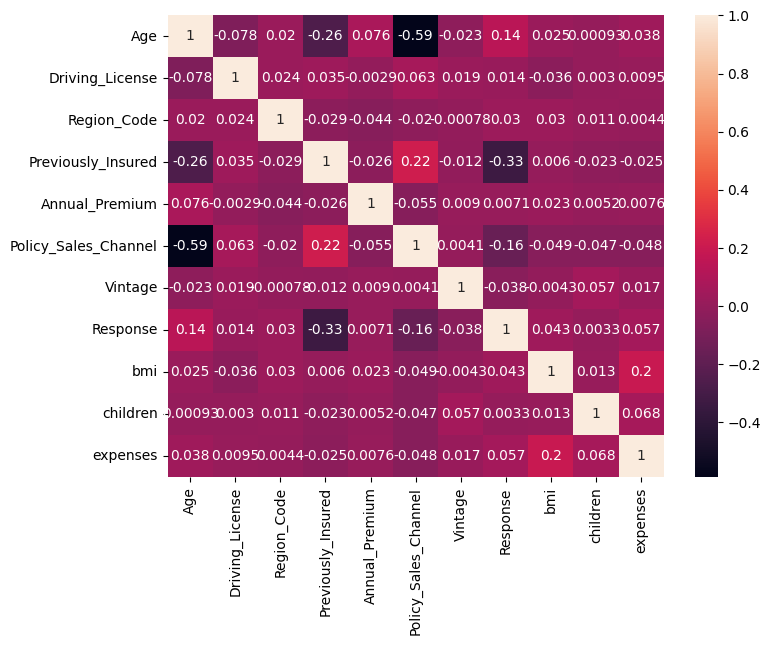

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot = True)

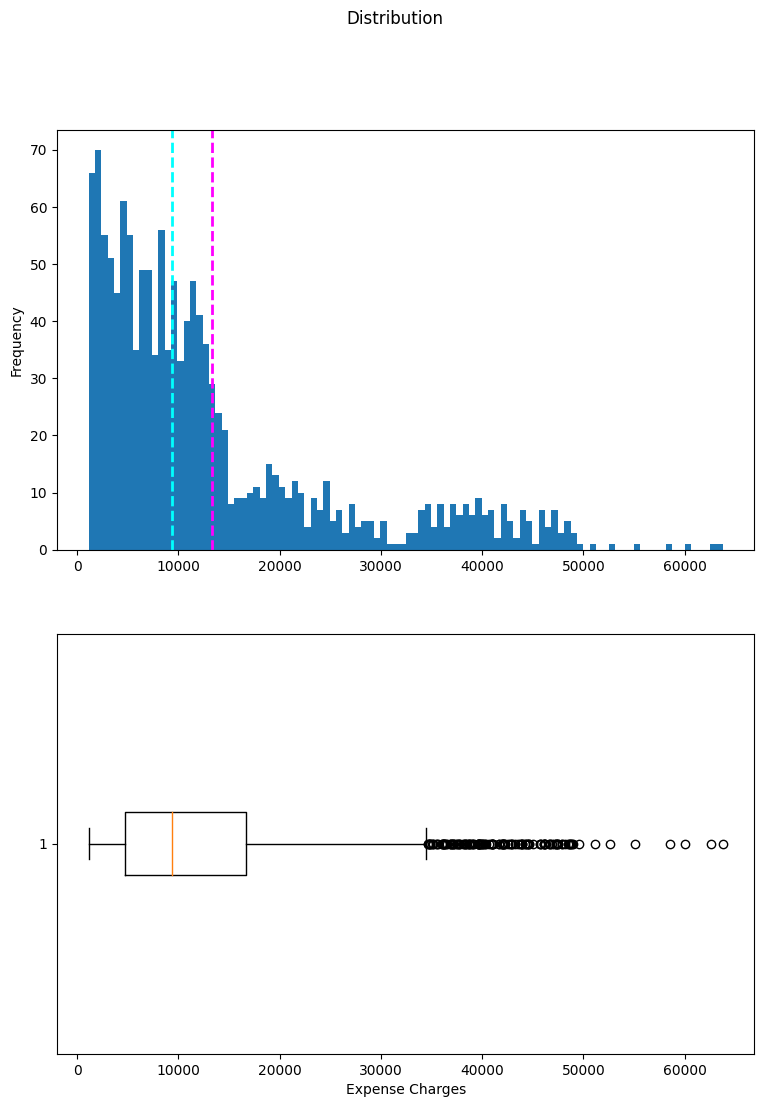

In [ ]:
"""
Observing distribution of target variable, 'expenses' in case of first phase regression task
"""
# target var 'expenses'
target_label = df[df.columns[15]]

fig, ax = plt.subplots(2, 1, figsize = (9,12))

ax[0].hist(target_label, bins=100)
ax[0].set_ylabel('Frequency')

# lines for the mean, median, and mode
ax[0].axvline(target_label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(target_label.median(), color='cyan', linestyle='dashed', linewidth=2)

ax[1].boxplot(target_label, vert=False)
ax[1].set_xlabel('Expense Charges')

fig.suptitle('Distribution')
fig.show()


In [ ]:
"""
A few outliers at expenses charged >= 50,000
"""

'\nA few outliers at expenses charged >= 50,000\n'

<ipython-input-11-b7aaf5db9759>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['Age'], kde = True, color = 'b')


Text(0.5, 1.0, 'Distribution of Age')

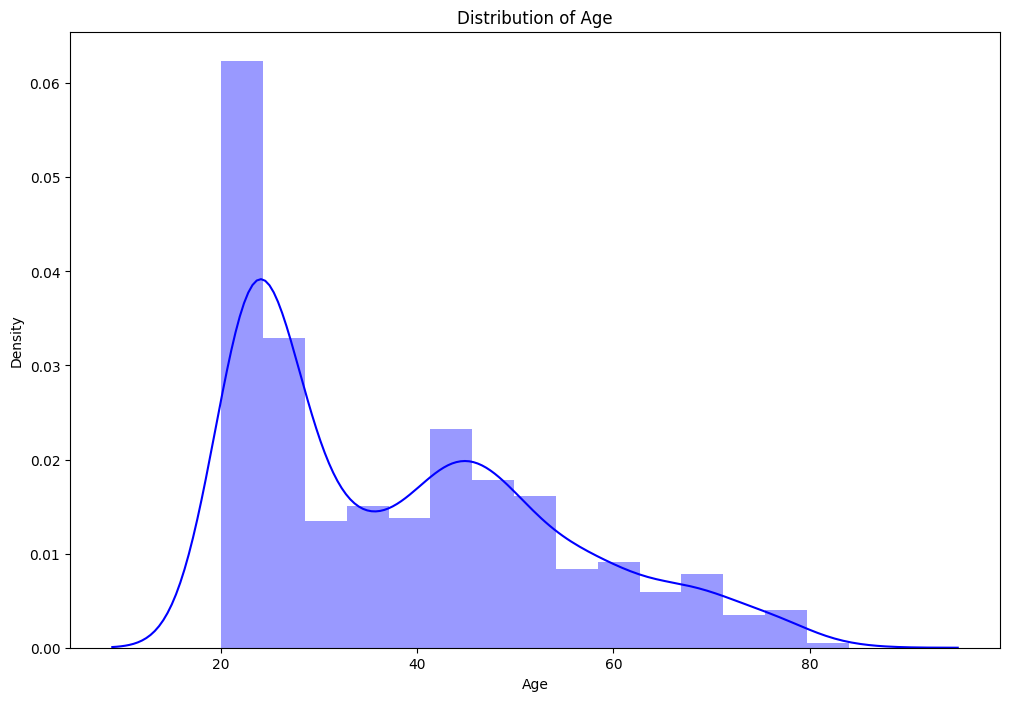

In [ ]:
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['Age'], kde = True, color = 'b')
plt.title('Distribution of Age')

In [ ]:
df['Gender'].value_counts()

Male      700
Female    638
Name: Gender, dtype: int64

In [ ]:
df.groupby('Gender')['expenses'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,638.0,13040.850737,11999.648264,1131.51,4676.640,9208.12,16006.9850,55135.40
Male,700.0,13479.660600,12214.541855,1121.87,4870.215,9558.28,17354.9525,63770.43


<Axes: xlabel='Gender', ylabel='expenses'>

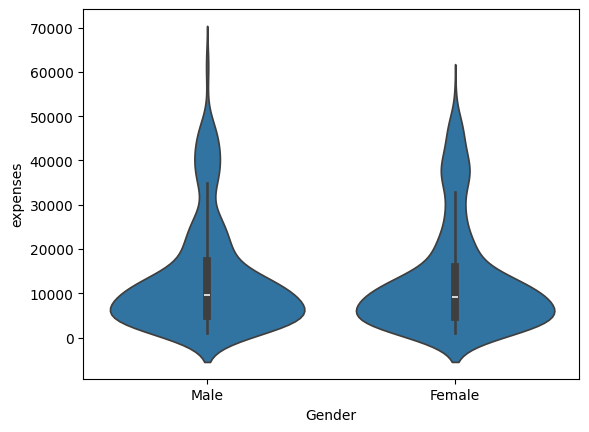

In [ ]:
sns.violinplot(data = df, x = 'Gender', y = 'expenses')

In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
df.groupby('region')['expenses'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,324.0,13406.384691,11255.802916,1694.80,5194.3225,10057.655,16687.3650,58571.07
northwest,325.0,12417.575169,11072.276880,1621.34,4719.7400,8965.800,14711.7400,60021.40
southeast,364.0,14735.411538,13971.098797,1121.87,4440.8850,9294.130,19526.2875,63770.43
southwest,325.0,12346.937908,11557.179033,1241.57,4751.0700,8798.590,13462.5200,52590.83


<Axes: xlabel='region', ylabel='expenses'>

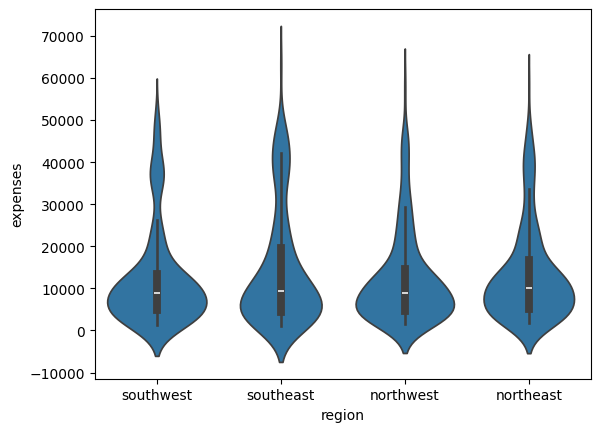

In [ ]:
sns.violinplot(data = df, x = 'region', y = 'expenses')

In [ ]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<Axes: xlabel='smoker', ylabel='expenses'>

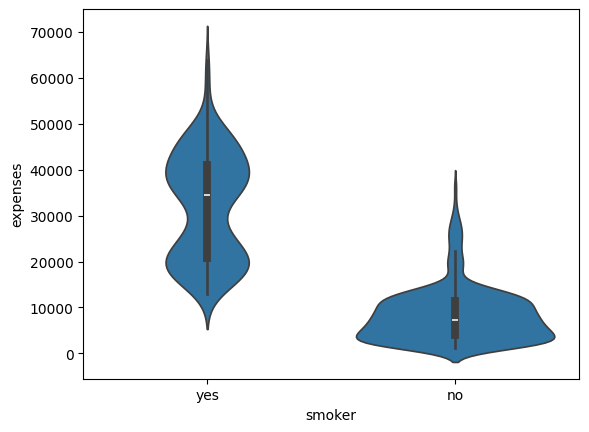

In [ ]:
sns.violinplot(data = df, x = 'smoker', y = 'expenses')

<Axes: xlabel='Gender', ylabel='Count'>

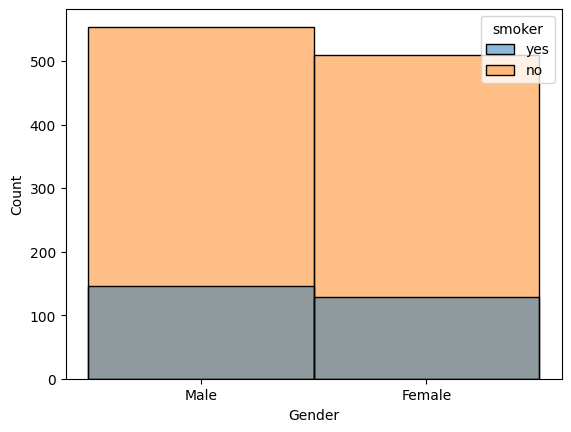

In [ ]:
# smokers by gender
sns.histplot(data = df, x = 'Gender', hue = "smoker")


In [14]:
"""
BMI indicators: underweight < 18, healthy 18 < 25, overweight 25 < 30, obese > 30
"""

bins = [0,18.5,25,30, 100]
slots = ['under-weight','healthy','over-weight', 'obese']

df['BMI_range'] = pd.cut(df['bmi'], bins = bins,labels = slots)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,bmi,children,smoker,region,expenses,BMI_range
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1,27.9,0,yes,southwest,16884.92,over-weight
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0,33.8,1,no,southeast,1725.55,obese
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1,33.0,3,no,southeast,4449.46,obese
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0,22.7,0,no,northwest,21984.47,healthy
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0,28.9,0,no,northwest,3866.86,over-weight


In [ ]:
df['BMI_range'].value_counts()

obese           698
over-weight     393
healthy         226
under-weight     21
Name: BMI_range, dtype: int64

<Axes: xlabel='BMI_range', ylabel='Count'>

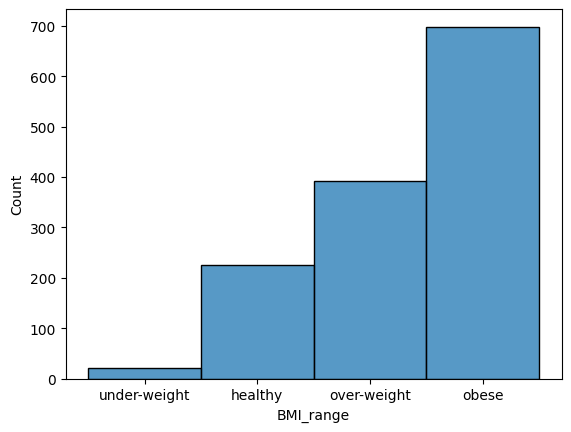

In [ ]:
sns.histplot(data = df, x = 'BMI_range')

In [ ]:
df.groupby('BMI_range')['expenses'].describe()

,count,mean,std,min,25%,50%,75%,max
BMI_range,,,,,,,,
under-weight,21.0,8657.621429,7591.730224,1621.34,2775.190,6640.540,12829.460,32734.19
healthy,226.0,10435.440752,7484.434461,1121.87,4146.835,8604.150,15197.260,35069.37
over-weight,393.0,11034.944784,8129.976883,1252.41,4571.410,8703.460,15828.820,38245.59
obese,698.0,15585.776834,14593.430893,1131.51,5241.885,10003.655,19629.185,63770.43


In [ ]:
"""
BMI and smokers and expenses impact
"""
df.groupby(['BMI_range', 'smoker'])['expenses'].describe()

count          mean          std       min        25%  \
BMI_range    smoker                                                          
under-weight no       16.0   5485.057500  3769.939143   1621.34   2657.030   
             yes       5.0  18809.826000  8110.515708  12829.46  14455.640   
healthy      no      176.0   7734.650284  5823.917784   1121.87   3199.995   
             yes      50.0  19942.223200  4202.478888  13747.87  16687.365   
over-weight  no      317.0   8254.217792  5950.748942   1252.41   4133.640   
             yes      76.0  22633.503421  5221.274310  15518.18  18568.375   
obese        no      555.0   8843.991387  6086.191591   1131.51   4333.715   
             yes     143.0  41751.447622  5806.871441  32548.34  37367.745   

                           50%         75%       max  
BMI_range    smoker                                   
under-weight no       4249.325   7569.5475  13204.29  
             yes     15006.580  19023.2600  32734.19  
healthy      no       6669.480  10254.0575  30166.62  
             yes     19479.905  22133.7875  35069.37  
over-weight  no       7046.720  11085.5900  35160.13  
             yes     21410.595  25013.7875  38245.59  
obese        no       8083.920  11753.4650  36910.61  
             yes     40932.430  45706.1150  63770.43

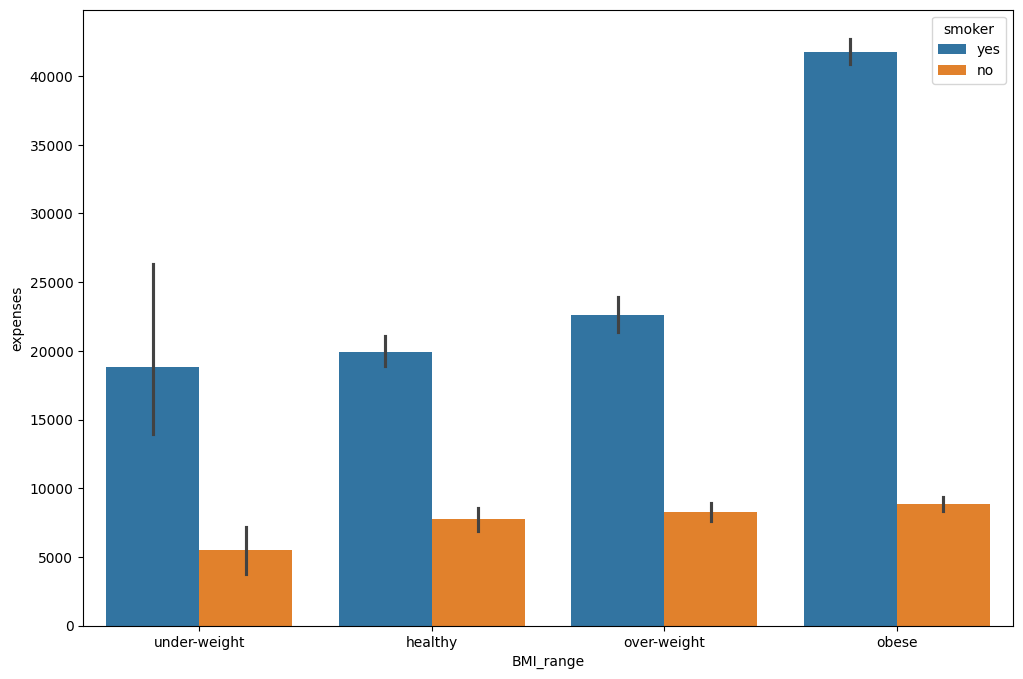

In [ ]:
"""
BMI and smokers
"""

fig, ax = plt.subplots(1, 1, figsize = (12, 8))
ax = sns.barplot(x = 'BMI_range', y = 'expenses', hue = 'smoker', data = df)

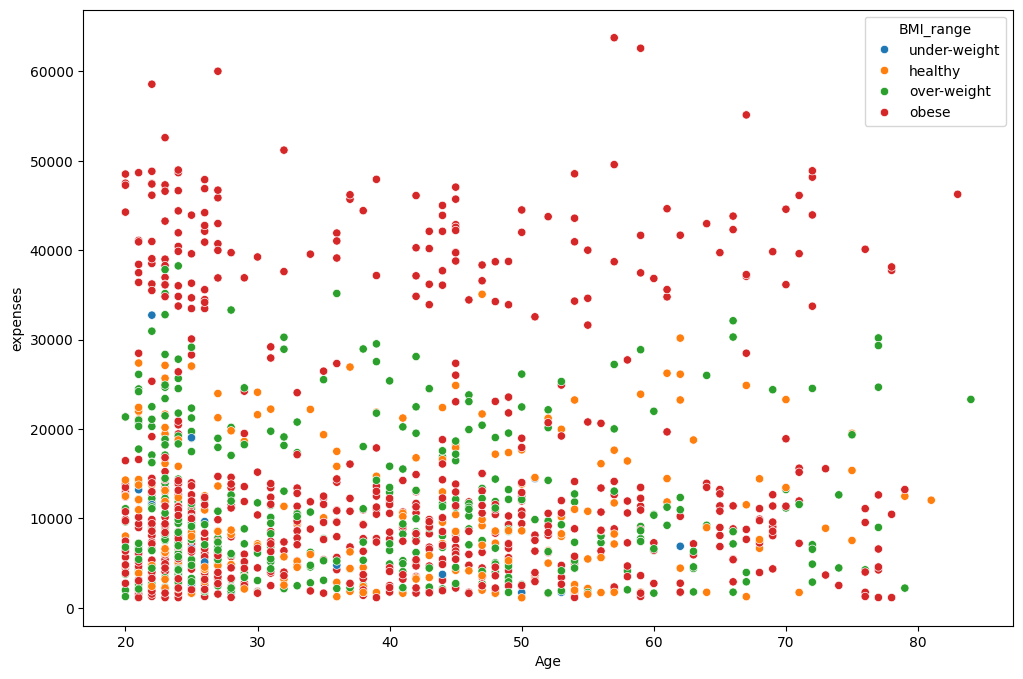

In [ ]:
"""
BMI and age
"""

fig, ax = plt.subplots(1, 1, figsize = (12, 8))
ax = sns.scatterplot(data = df, x = 'Age', y = 'expenses', hue = 'BMI_range')

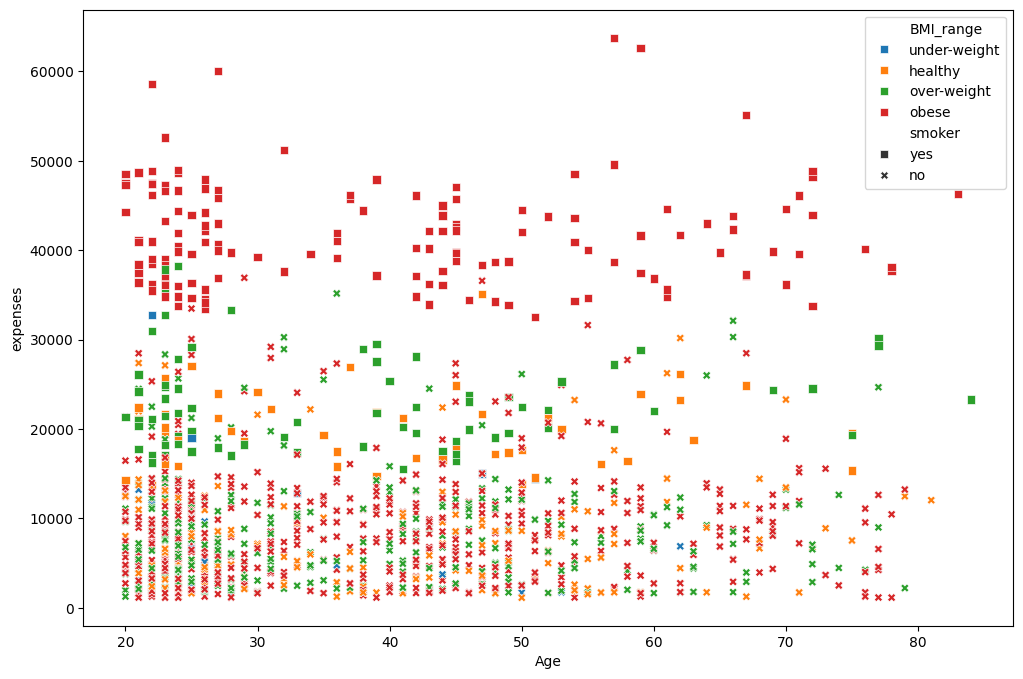

In [ ]:
"""
BMI, smokers, age
"""

markers = {"yes": "s", "no": "X"}
fig, ax = plt.subplots(1, 1, figsize = (12, 8))
ax = sns.scatterplot(data = df, x = 'Age', y = 'expenses', hue = 'BMI_range', style = 'smoker', markers = markers)


## Pre-processing

In [ ]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,bmi,children,smoker,region,expenses,BMI_range
0,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1,27.9,0,yes,southwest,16884.92,over-weight
1,Male,76,1,3,0,1-2 Year,No,33536,26,183,0,33.8,1,no,southeast,1725.55,obese
2,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1,33.0,3,no,southeast,4449.46,obese
3,Male,21,1,11,1,< 1 Year,No,28619,152,203,0,22.7,0,no,northwest,21984.47,healthy
4,Female,29,1,41,1,< 1 Year,No,27496,152,39,0,28.9,0,no,northwest,3866.86,over-weight


In [ ]:
"""
Extracting only subset of df
"""

prep_reg_df = df[['Gender', 'Age', 'bmi', 'smoker', 'region', 'expenses', 'children']]
prep_reg_df.head()

,Gender,Age,bmi,smoker,region,expenses,children
0,Male,44,27.9,yes,southwest,16884.92,0
1,Male,76,33.8,no,southeast,1725.55,1
2,Male,47,33.0,no,southeast,4449.46,3
3,Male,21,22.7,no,northwest,21984.47,0
4,Female,29,28.9,no,northwest,3866.86,0


In [ ]:
"""
Removing outliers for expenses
"""

prep_reg_df = prep_reg_df[prep_reg_df['expenses'] < 50000]




In [ ]:
"""
Encoding: gender, smoker, region
"""


gender = {'Male': 1, 'Female': 0}
smoker = {'yes': 1, 'no': 0}

prep_reg_df.Gender = [gender[item] for item in prep_reg_df.Gender]
prep_reg_df.smoker = [smoker[item] for item in prep_reg_df.smoker]


dummies_reg = pd.get_dummies(prep_reg_df['region'], prefix = 'region')
prep_reg_df = pd.concat([prep_reg_df, dummies_reg], axis = 1)
prep_reg_df = prep_reg_df.drop('region', axis = 1)

In [ ]:
prep_reg_df.head()

,Gender,Age,bmi,smoker,expenses,children,region_northeast,region_northwest,region_southeast,region_southwest
0,1,44,27.9,1,16884.92,0,0,0,0,1
1,1,76,33.8,0,1725.55,1,0,0,1,0
2,1,47,33.0,0,4449.46,3,0,0,1,0
3,1,21,22.7,0,21984.47,0,0,1,0,0
4,0,29,28.9,0,3866.86,0,0,1,0,0


In [ ]:
# drop target var
x = prep_reg_df.drop(['expenses'], axis = 1)
y = prep_reg_df['expenses']

# train / test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 43)

# normalizing features for numerical attributes
num_cols = ['Age','bmi','children']

minmax = MinMaxScaler()
X_train[num_cols] = minmax.fit_transform(X_train[num_cols])
X_test[num_cols] = minmax.transform(X_test[num_cols])


## Modeling

### Lin Reg

In [ ]:
model = LinearRegression().fit(X_train, y_train)

predictions = model.predict(X_test)
np.set_printoptions(suppress = True)

print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' , y_test[:10])

Predicted labels:  [ 6176.  6624.  8768. 27680.  9696.  5824.  8640. 10848.  7904. 12224.]
Actual labels   :  737      3484.33
551      3972.92
1025     2020.18
975     16138.76
986      8410.05
1285     8534.67
1097     1674.63
1248     1633.96
1283     1720.35
442      1149.40
Name: expenses, dtype: float64


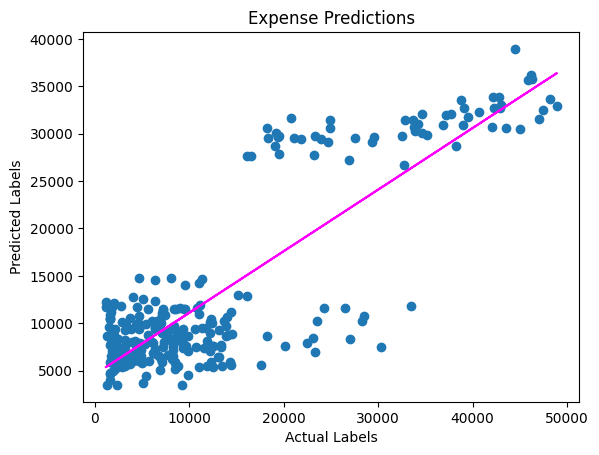

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Expense Predictions')


z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()



In [ ]:
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 44745092.403639704
RMSE: 6689.177259098439
R2: 0.7125039794668366


### Random Forest Reg

In [ ]:
model_rf = RandomForestRegressor().fit(X_train, y_train)


predictions = model_rf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)


MSE: 40508632.768369935
RMSE: 6364.639248878913
R2: 0.7397240659805111


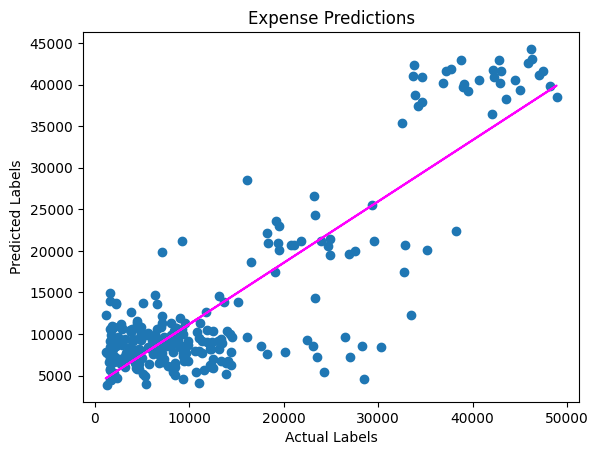

In [ ]:

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Expense Predictions')


z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

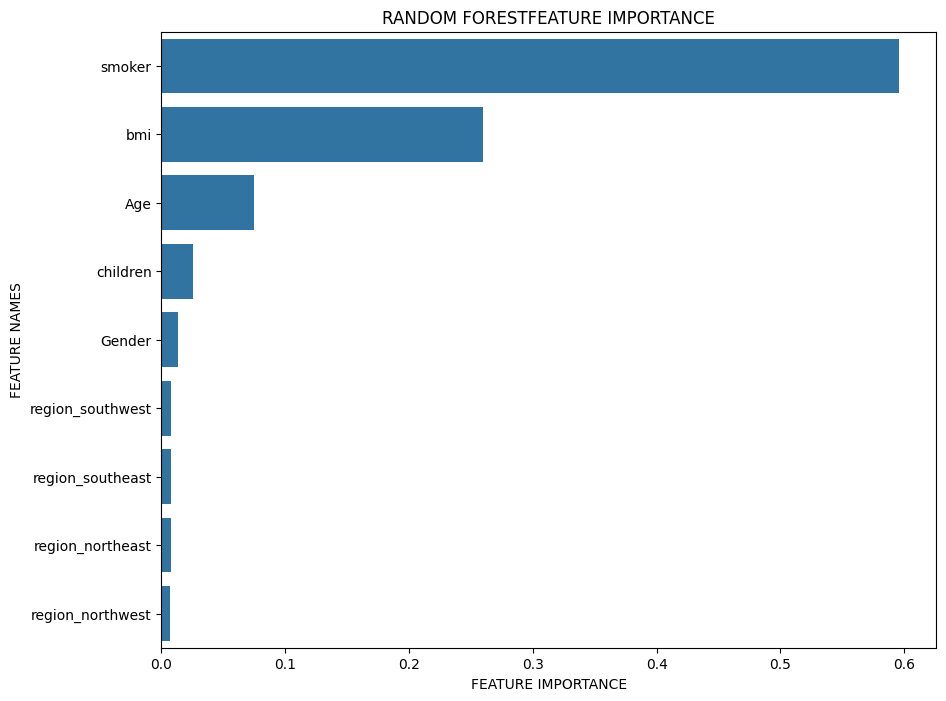

In [ ]:
def plot_feature_importance(importance, names, model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')



rf = RandomForestRegressor()
rf_fit = rf.fit(X_train, y_train)

feature_importances = rf_fit.feature_importances_

plot_feature_importance(rf_fit.feature_importances_, X_train.columns, 'RANDOM FOREST')

In [ ]:
"""
Random Forest with Grid Search
"""

grid = {
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [43]
}


CV_rfr = GridSearchCV(estimator = RandomForestRegressor(), param_grid = grid, cv= 5)
CV_rfr.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [43]})

In [ ]:
CV_rfr.best_params_

{'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 500,
 'random_state': 43}

In [ ]:
"""
Leverage best params
"""

rf = RandomForestRegressor(n_estimators = 500, max_features = 'sqrt', max_depth = 7, random_state = 43)
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 36339435.73220046
RMSE: 6028.219947231559
R2: 0.7665119770636915


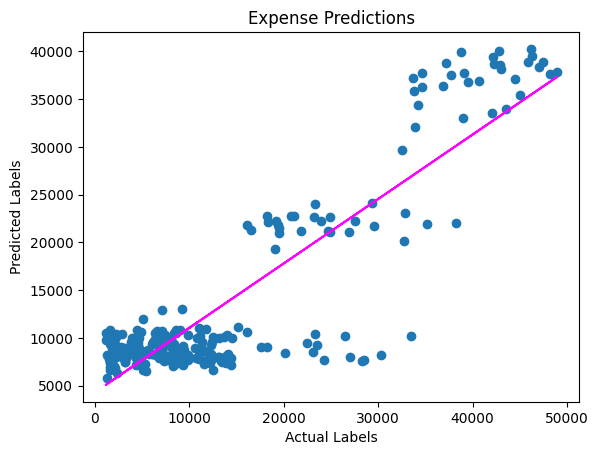

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Expense Predictions')


z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


# Classification

## EDA

In [3]:
response_value_count_df = pd.DataFrame(df['Response'].value_counts().rename_axis('Response').reset_index(name='counts'))
response_value_count_df['percentage'] = round(100 * (response_value_count_df['counts'] / len(df)),1)
response_value_count_df


,Response,counts,percentage
0,0,1177,88.0
1,1,161,12.0


<Axes: xlabel='Response', ylabel='count'>

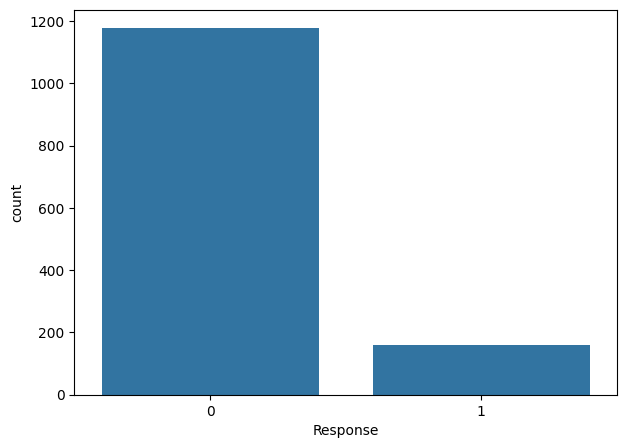

In [4]:
"""
About 12% interested in bundling
"""

fig, ax = plt.subplots(1,1, figsize=(7,5))
sns.countplot(x = df["Response"], order=[0,1], ax=ax)

<ipython-input-5-27b92376a1c5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Vintage'])


<Axes: xlabel='Vintage', ylabel='Density'>

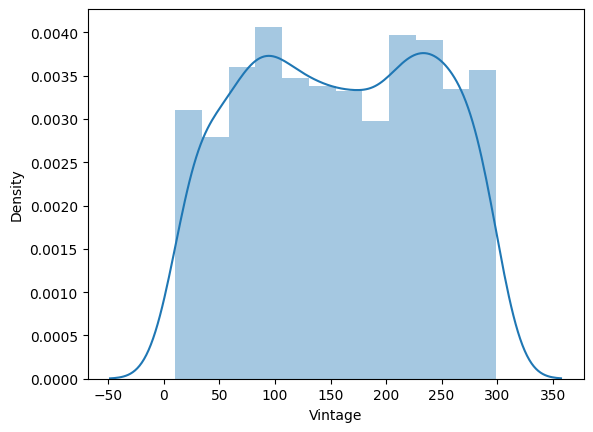

In [5]:
sns.distplot(df['Vintage'])

<ipython-input-6-60b0b77c6bf9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual_Premium'])


<Axes: xlabel='Annual_Premium', ylabel='Density'>

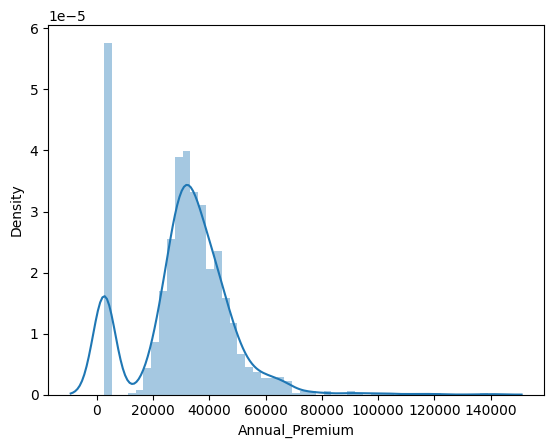

In [6]:
sns.distplot(df['Annual_Premium'])

In [7]:
df.Previously_Insured.value_counts()



0    740
1    598
Name: Previously_Insured, dtype: int64

<ipython-input-8-5ee46ffd8b1b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Vehicle_Age', palette = 'Set1', data = df)


<Axes: xlabel='Vehicle_Age', ylabel='count'>

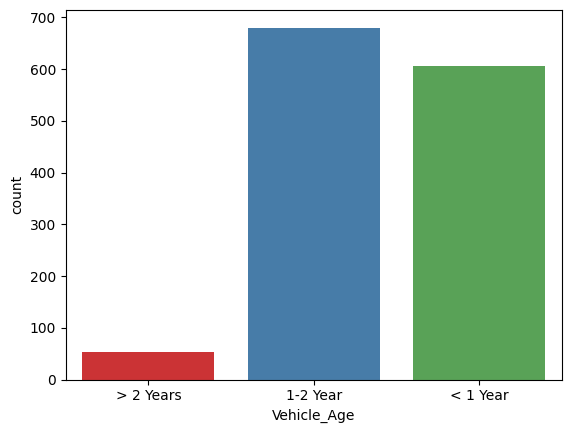

In [8]:
sns.countplot(x = 'Vehicle_Age', palette = 'Set1', data = df)

In [9]:
df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()


,Vehicle_Age,Response,count
0,1-2 Year,0,562
1,1-2 Year,1,118
2,< 1 Year,0,581
3,< 1 Year,1,24
4,> 2 Years,0,34
5,> 2 Years,1,19


<ipython-input-10-22eb363a7c24>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Previously_Insured', palette = 'Set1', data = df)


<Axes: xlabel='Previously_Insured', ylabel='count'>

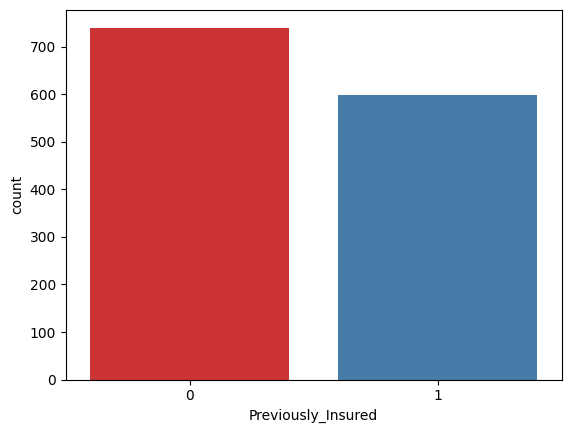

In [10]:
sns.countplot(x = 'Previously_Insured', palette = 'Set1', data = df)

In [11]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,bmi,children,smoker,region,expenses
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1,27.9,0,yes,southwest,16884.92
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0,33.8,1,no,southeast,1725.55
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1,33.0,3,no,southeast,4449.46
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0,22.7,0,no,northwest,21984.47
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0,28.9,0,no,northwest,3866.86


<ipython-input-12-3eb4ccfa4d0d>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = 'Age', hue = 'Response', palette = 'Set1', shade = True, data = df)
<ipython-input-12-3eb4ccfa4d0d>:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = 'Region_Code', hue='Response', palette = 'Set1', shade = True, data=df)
<ipython-input-12-3eb4ccfa4d0d>:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = 'Annual_Premium', hue = 'Response', palette = 'Set1', shade = True, data = df)
<ipython-input-12-3eb4ccfa4d0d>:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in se

<Axes: xlabel='Vintage', ylabel='Density'>

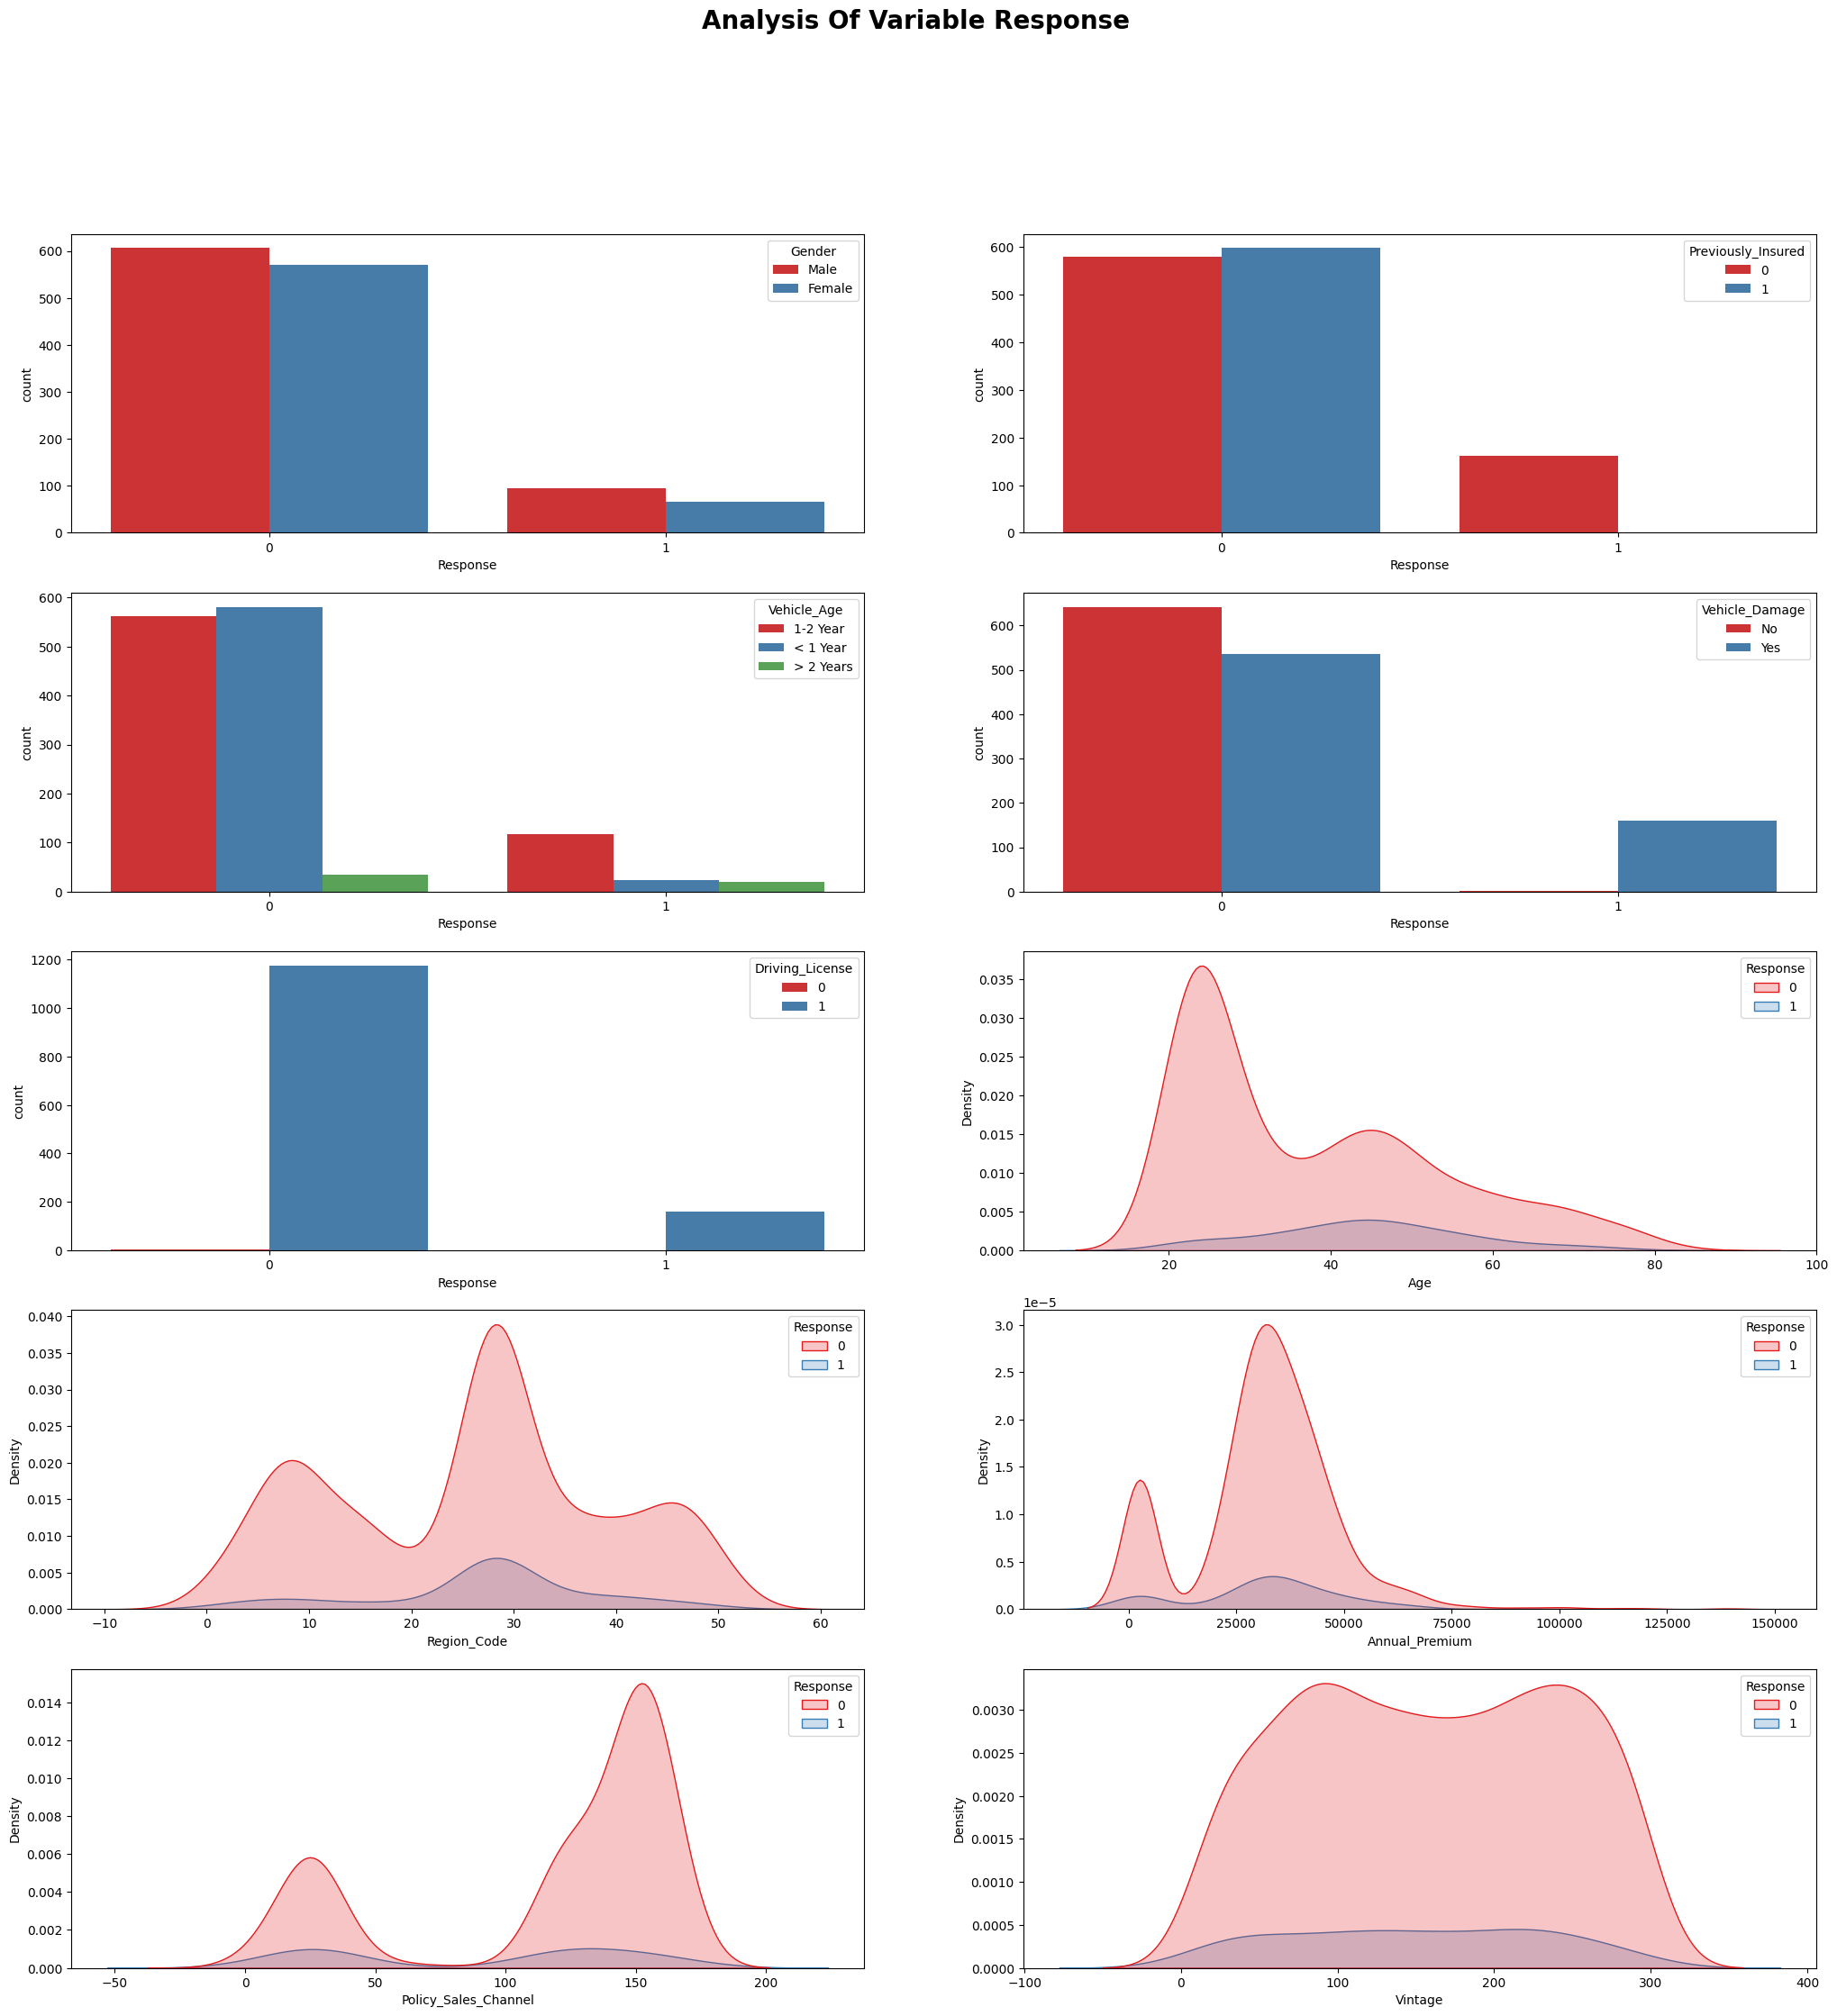

In [12]:
plt.figure(figsize = (25, 25))
plt.suptitle("Analysis Of Variable Response", fontweight="bold", fontsize = 20)

plt.subplot(5,2,1)
sns.countplot(x = 'Response', hue = 'Gender', palette = 'Set1', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'Response', hue = 'Previously_Insured', palette = 'Set1', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'Response', hue = 'Vehicle_Age', palette = 'Set1', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'Response', hue = 'Vehicle_Damage', palette = 'Set1', data = df)

plt.subplot(5,2,5)
sns.countplot(x = 'Response', hue = 'Driving_License', palette = 'Set1', data = df)

plt.subplot(5,2,6)
sns.kdeplot(x = 'Age', hue = 'Response', palette = 'Set1', shade = True, data = df)

plt.subplot(5,2,7)
sns.kdeplot(x = 'Region_Code', hue='Response', palette = 'Set1', shade = True, data=df)

plt.subplot(5,2,8)
sns.kdeplot(x = 'Annual_Premium', hue = 'Response', palette = 'Set1', shade = True, data = df)

plt.subplot(5,2,9)
sns.kdeplot(x = 'Policy_Sales_Channel', hue = 'Response', palette = 'Set1', shade = True, data = df)

plt.subplot(5,2,10)
sns.kdeplot(x = 'Vintage', hue = 'Response', palette = 'Set1', shade = True, data = df)


<Axes: xlabel='Response', ylabel='count'>

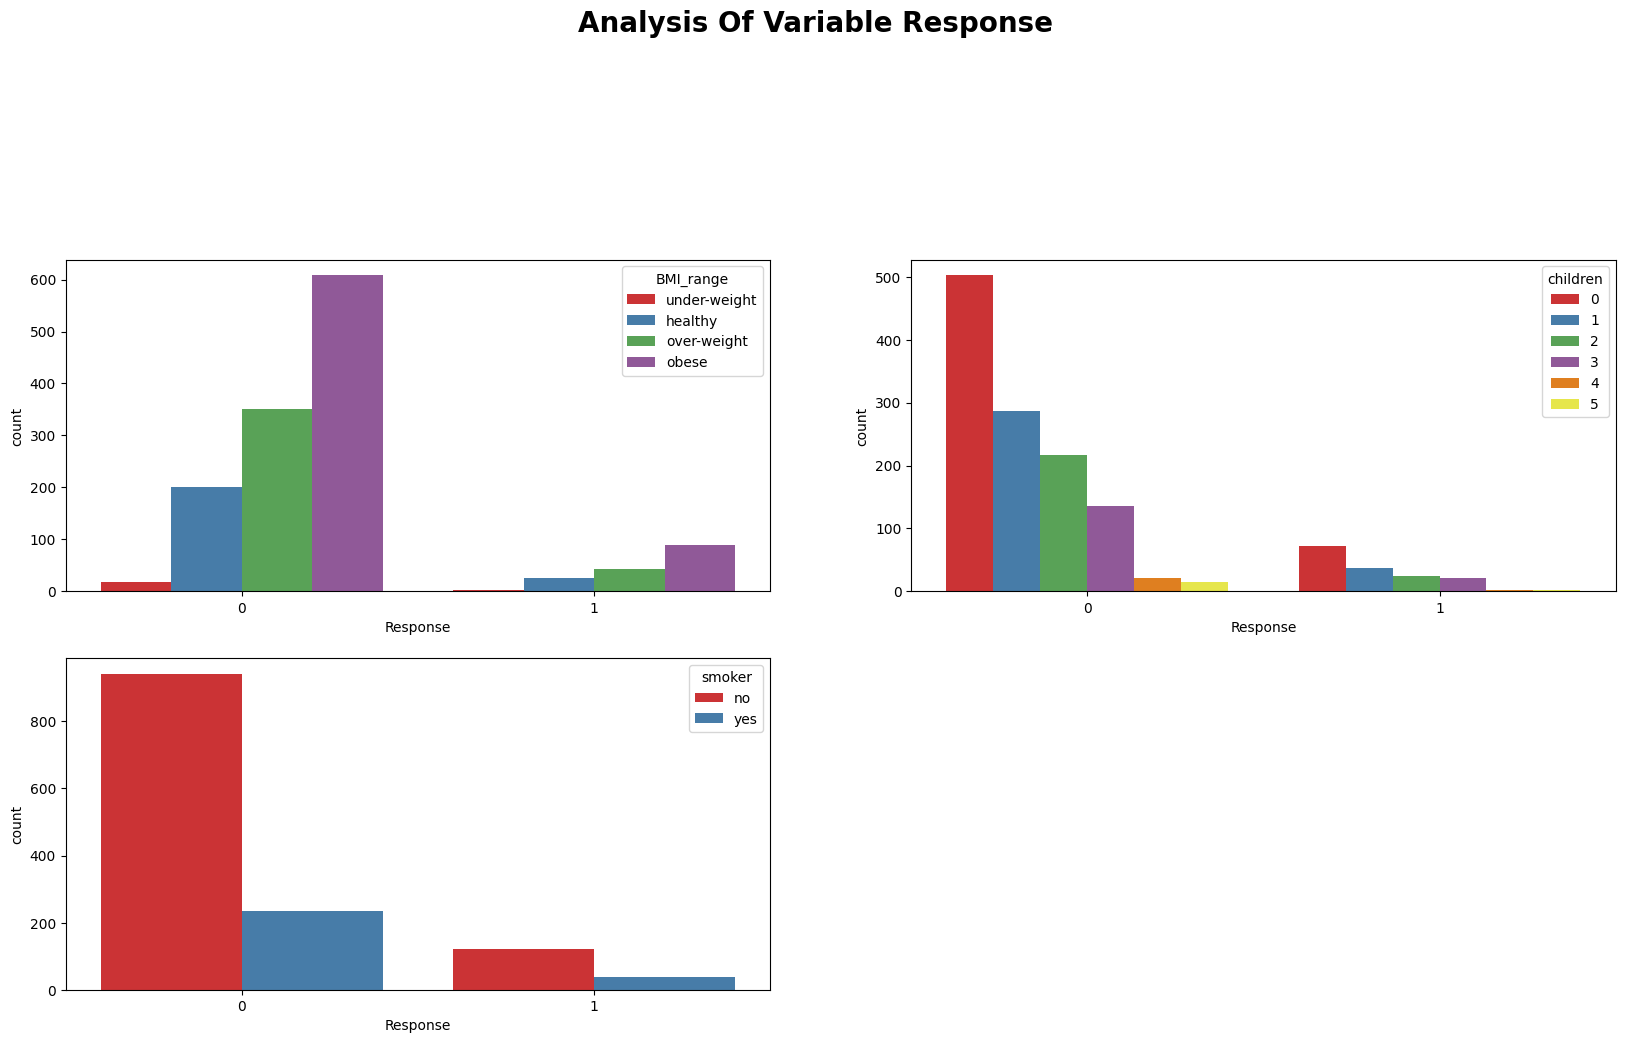

In [15]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable Response", fontweight="bold", fontsize = 20)

plt.subplot(5,2,1)
sns.countplot(x = 'Response', hue = 'BMI_range', palette = 'Set1', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'Response', hue = 'children', palette = 'Set1', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'Response', hue = 'smoker', palette = 'Set1', data = df)

In [16]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,bmi,children,smoker,region,expenses,BMI_range
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1,27.9,0,yes,southwest,16884.92,over-weight
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0,33.8,1,no,southeast,1725.55,obese
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1,33.0,3,no,southeast,4449.46,obese
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0,22.7,0,no,northwest,21984.47,healthy
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0,28.9,0,no,northwest,3866.86,over-weight


## Pre-Processing

In [22]:
"""
cols to keep: gender, age, driving_license, previously_insured, annual_premium, vintage, region_code, policy_sales
              vehicle_damage, vehicle_age
cols to drop: bmi, children, smoker, region
"""

class_df = df.drop(['bmi', 'children', 'smoker', 'region', 'BMI_range'], axis = 1)
class_df.head()


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,expenses
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1,16884.92
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0,1725.55
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1,4449.46
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0,21984.47
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0,3866.86


In [23]:

class_df = class_df.drop(['id', 'Response'], axis = 1)
X = class_df.values
y = df['Response']

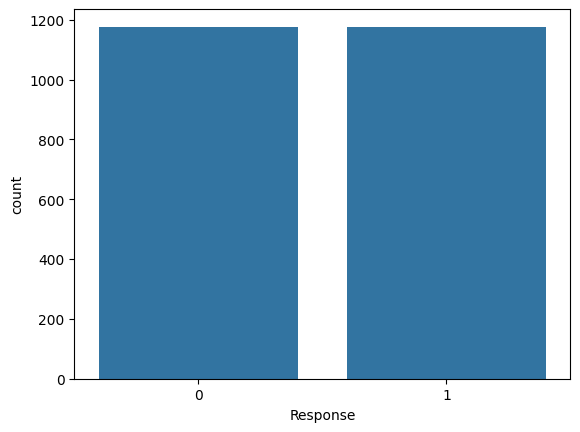

In [24]:
"""
fixing class imbalance with over sampling:
https://imbalanced-learn.org/stable/over_sampling.html#random-over-sampler
"""

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 123)

X, y = ros.fit_resample(X, y)

ax = sns.countplot(x = y)

In [25]:
"""
encoding categorical features
"""

label_encoder_gender = LabelEncoder()
label_encoder_Driving_License = LabelEncoder()
label_encoder_Previously_Insured = LabelEncoder()
label_encoder_Vehicle_Age = LabelEncoder()
label_encoder_Vehicle_Damage = LabelEncoder()

X[:,0] = label_encoder_gender.fit_transform(X[:,0])
X[:,2] = label_encoder_Driving_License.fit_transform(X[:,2])
X[:,4] = label_encoder_Previously_Insured.fit_transform(X[:,4])
X[:,5] = label_encoder_Vehicle_Age.fit_transform(X[:,5])
X[:,6] = label_encoder_Vehicle_Damage.fit_transform(X[:,6])


In [26]:
"""
scaling to same range
"""

scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [27]:

X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.2, random_state = 43)



## Modeling

### Naive Bayes

In [31]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

0.7876857749469215

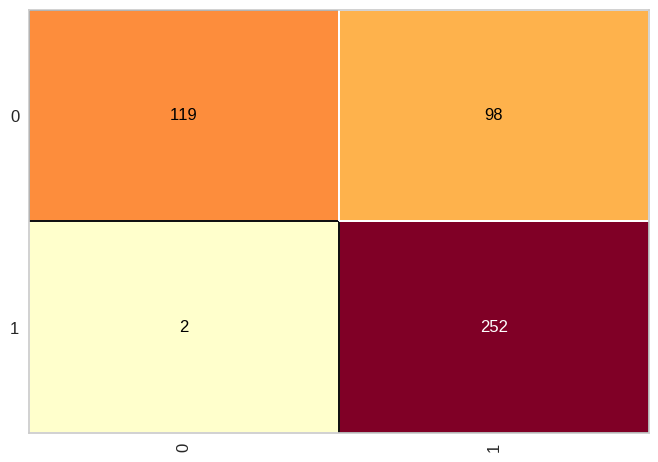

In [32]:
predictions = naive_bayes.predict(X_test)

cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [33]:
classification_naive_gaussian = (classification_report(y_test, predictions))
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.98      0.55      0.70       217
           1       0.72      0.99      0.83       254

    accuracy                           0.79       471
   macro avg       0.85      0.77      0.77       471
weighted avg       0.84      0.79      0.77       471



### Logistic Regression

In [43]:
logistic = LogisticRegression(random_state = 132, max_iter = 1000)

logistic.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=132)

0.7876857749469215

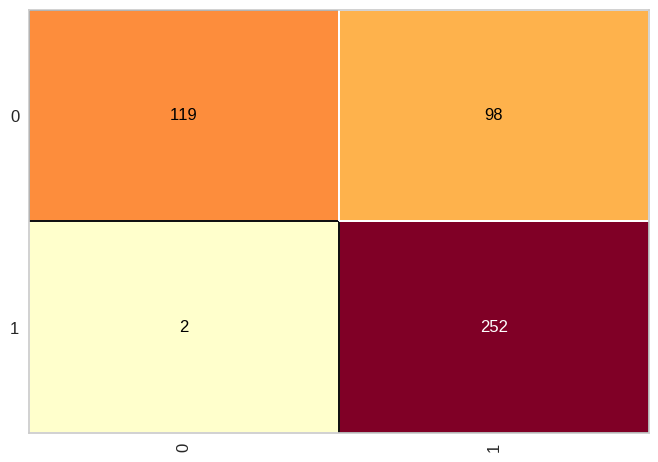

In [44]:
predictions = logistic.predict(X_test)

cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [45]:
logistic_report = (classification_report(y_test, predictions))
print(logistic_report)

              precision    recall  f1-score   support

           0       0.98      0.55      0.70       217
           1       0.72      0.99      0.83       254

    accuracy                           0.79       471
   macro avg       0.85      0.77      0.77       471
weighted avg       0.84      0.79      0.77       471



### Random Forest

In [35]:
n_estimators = np.array([100])
alg = ['entropy', 'gini']
values_grid = {'n_estimators': n_estimators, 'criterion': alg}

model = RandomForestClassifier()

gridRandomForest = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)

gridRandomForest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'n_estimators': array([100])})

In [36]:
print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)

Algorithm:  gini
Score:  0.9378590778260625


In [37]:
random_forest = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 123)

random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)



0.9596602972399151

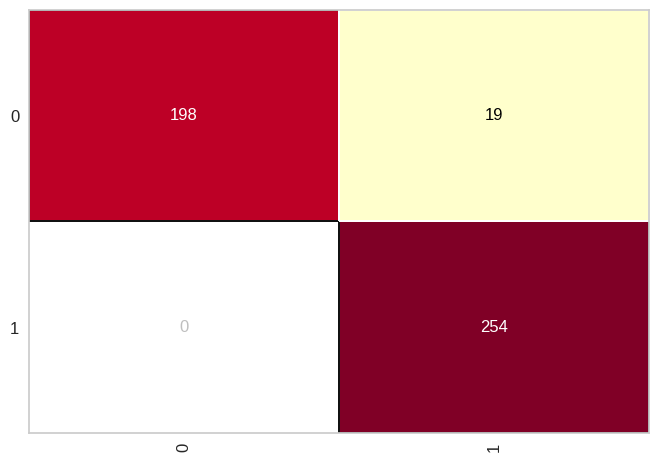

In [38]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [39]:
classification_random = (classification_report(y_test, predictions))

print(classification_random)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       217
           1       0.93      1.00      0.96       254

    accuracy                           0.96       471
   macro avg       0.97      0.96      0.96       471
weighted avg       0.96      0.96      0.96       471



In [41]:

columns = class_df.columns
pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)


Vehicle_Damage          0.175041
Previously_Insured      0.154982
Age                     0.134027
Vintage                 0.118900
expenses                0.116359
Annual_Premium          0.106537
Region_Code             0.083591
Policy_Sales_Channel    0.071978
Vehicle_Age             0.022155
Gender                  0.016178
Driving_License         0.000253
dtype: float64